# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
# Import your chosen baseline model


## Model Choice

We started out with a very easy baeline model that just guesses the forecast of the next 15 Minutes based on the last 15 minutes


In [34]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('../Data/Load_cleaned.csv')
df.head()

,Unnamed: 0,from,to,load,residual,pumped,time,month,weekday,hour
0,0,01.11.2018 00:00,01.11.2018 01:00,48879.50,34530.00,"3295,75",2018-11-01 00:00:00,11,3,0
1,1,01.11.2018 01:00,01.11.2018 02:00,47312.50,33605.50,"3848,00",2018-11-01 01:00:00,11,3,1
2,2,01.11.2018 02:00,01.11.2018 03:00,46093.75,32232.00,"4452,25",2018-11-01 02:00:00,11,3,2
3,3,01.11.2018 03:00,01.11.2018 04:00,46710.50,33261.75,"4855,75",2018-11-01 03:00:00,11,3,3
4,4,01.11.2018 04:00,01.11.2018 05:00,47624.25,33987.75,"3854,50",2018-11-01 04:00:00,11,3,4


## Implementation

Split the data and start the naive forecast model


In [35]:
# Convert the 'from' column to datetime
df['from'] = pd.to_datetime(df['from'], format='%d.%m.%Y %H:%M')

# Split the data into train and test sets based on date
train = df[df['from'] < '2023-10-30']
test = df[df['from'] >= '2023-10-30']

In [39]:
# Implement the naive forecast on the test set
# The naive forecast is simply the last known value from the training set for each point in the test set
test['Naive_Forecast'] = train['load'].iloc[-1]  # Initialize with the last training Actual Total Load [MW] - BZN|DE-LU

# Shift by one row within the test set to create the naive forecast (t-1)
test['Naive_Forecast'] = test['load'].shift(1)

# Drop the first row in the test set since it will have NaN for the naive forecast
test = test.dropna().reset_index(drop=True)

C:\Users\TimPr\AppData\Local\Temp\ipykernel_16372\896873978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Naive_Forecast'] = train['load'].iloc[-1]  # Initialize with the last training Actual Total Load [MW] - BZN|DE-LU
C:\Users\TimPr\AppData\Local\Temp\ipykernel_16372\896873978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Naive_Forecast'] = test['load'].shift(1)


## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [40]:
# Filter the test set for one week's data
one_week_test = test[(test['from'] >= '2023-11-01 00:00') & (test['from'] < '2023-11-08 00:00')]


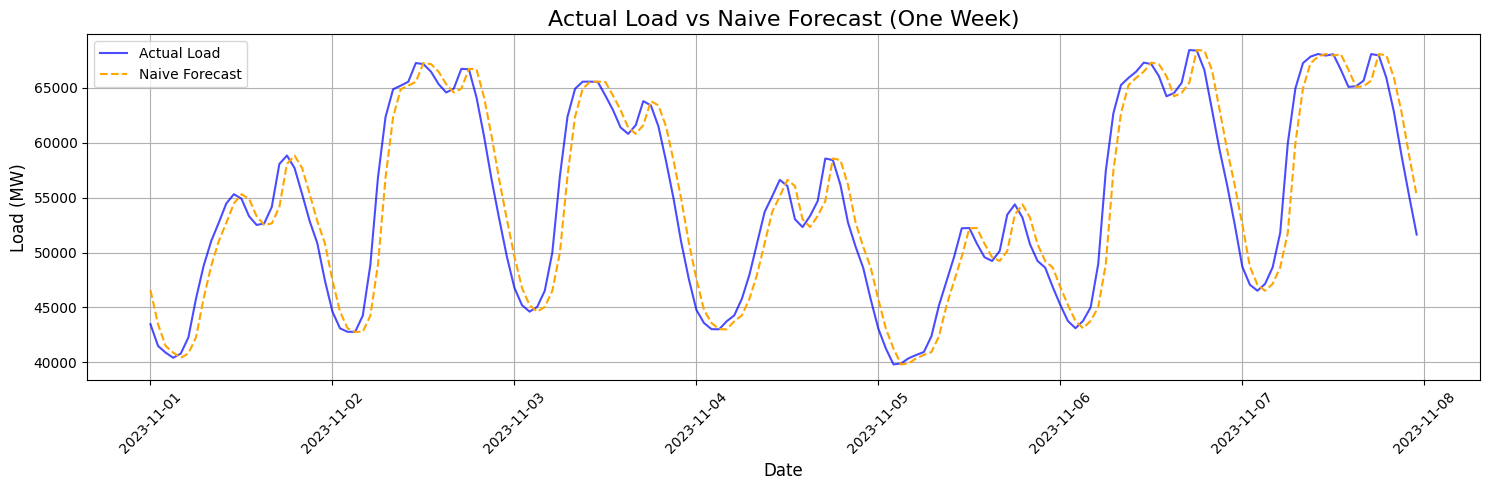

In [ ]:
# Plot the actual load and naive forecast
plt.figure(figsize=(15, 5))
plt.plot(one_week_test['from'], one_week_test['load'], label='Actual Load', color='blue', alpha=0.7)
plt.plot(one_week_test['from'], one_week_test['Naive_Forecast'], label='Naive Forecast', color='orange', linestyle='--')
plt.title('Actual Load vs Naive Forecast (One Week)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Load (MW)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
mae = mean_absolute_error(test['load'], test['Naive_Forecast'])
# Calculate MAPE
mape = mean_absolute_percentage_error(test['load'], test['Naive_Forecast'])

# Print MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
# Print MAE
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Percentage Error (MAPE): 0.0345927085760543%
Mean Absolute Error (MAE): 1807.924300758691
